This is a simple demo o Bayesian modelling of RT using pymc3 and bambi

In [1]:
import pandas as pd
import numpy as numpy
import pymc3 as pm
import bambi as bmb
import arviz as az
import hddm
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
data = hddm.load_csv(hddm.__path__[0] + '/examples/cavanagh_theta_nn.csv')
data.head()

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.21,1.0,0.656275,1,HC
1,0,WL,1.63,1.0,-0.327889,1,LC
2,0,WW,1.03,1.0,-0.480285,1,HC
3,0,WL,2.77,1.0,1.927427,1,LC
4,0,WW,1.14,0.0,-0.213236,1,HC


In [3]:
df=data[data['response']==1.0].copy()
df['subj_idx'] = df.subj_idx.astype('category')
df['stim'] = df.stim.astype('category')

In [4]:
df.describe()

,rt,response,theta,dbs
count,2721.000000,2721.0,2721.000000,2721.000000
mean,1.359660,1.0,-0.005273,0.485483
std,0.655718,0.0,0.999107,0.499881
min,0.402000,1.0,-3.246015,0.000000
25%,0.879000,1.0,-0.591140,0.000000
50%,1.210000,1.0,-0.155123,0.000000
75%,1.690000,1.0,0.457236,1.000000
max,4.840000,1.0,3.741730,1.000000


In [5]:
df.isnull().values.any()

False

In [6]:
df.describe(include='all')

,subj_idx,stim,rt,response,theta,dbs,conf
count,2721.0,2721,2721.000000,2721.0,2721.000000,2721.000000,2721
unique,14.0,3,NaN,NaN,NaN,NaN,2
top,11.0,WL,NaN,NaN,NaN,NaN,LC
freq,242.0,1558,NaN,NaN,NaN,NaN,1558
mean,NaN,NaN,1.359660,1.0,-0.005273,0.485483,NaN
std,NaN,NaN,0.655718,0.0,0.999107,0.499881,NaN
min,NaN,NaN,0.402000,1.0,-3.246015,0.000000,NaN
25%,NaN,NaN,0.879000,1.0,-0.591140,0.000000,NaN
50%,NaN,NaN,1.210000,1.0,-0.155123,0.000000,NaN
75%,NaN,NaN,1.690000,1.0,0.457236,1.000000,NaN


In [7]:
model1 = bmb.Model(formula="rt ~ stim + (1|subj_idx)", 
                   data=df, 
                   # family="wald", 
                   dropna=True)

In [8]:
fitted_m1 = model1.fit(tune=200, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rt_sigma, 1|subj_idx_offset, 1|subj_idx_sigma, stim, Intercept]


Sampling 4 chains for 200 tune and 1_000 draw iterations (800 + 4_000 draws total) took 571 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [9]:
model2 = bmb.Model(formula="rt ~ stim", 
                  data=df, 
                  # family="wald", 
                  dropna=True)
fitted_m2 = model2.fit(tune=200, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rt_sigma, stim, Intercept]


Sampling 4 chains for 200 tune and 1_000 draw iterations (800 + 4_000 draws total) took 136 seconds.
The acceptance probability does not match the target. It is 0.9619809470437646, but should be close to 0.9. Try to increase the number of tuning steps.


In [10]:
models={"hierarchical": fitted_m1, "nonhierach": fitted_m2}
df_compare = az.compare(models)
df_compare

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
hierarchical,0,-2357.558887,18.101548,0.000000,1.0,51.359227,0.000000,False,log
nonhierach,1,-2691.388044,5.183634,333.829157,0.0,51.986563,21.199758,False,log


In [11]:
fitted_m1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
fitted_m2

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

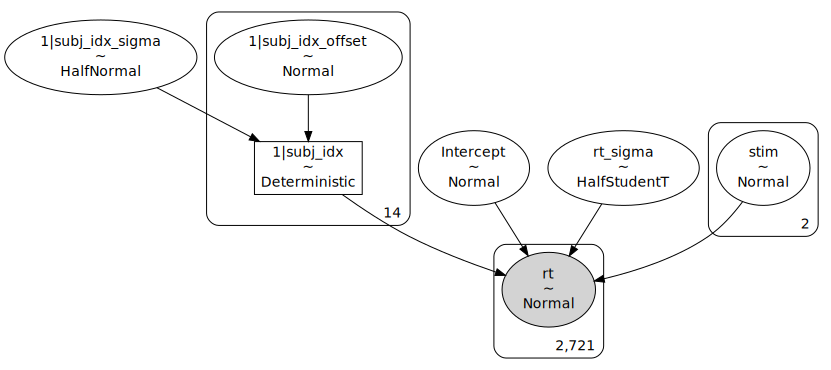

In [13]:
model1.graph()

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stim'}>,
        <AxesSubplot:title={'center':'stim'}>],
       [<AxesSubplot:title={'center':'1|subj_idx_sigma'}>,
        <AxesSubplot:title={'center':'1|subj_idx_sigma'}>],
       [<AxesSubplot:title={'center':'1|subj_idx'}>,
        <AxesSubplot:title={'center':'1|subj_idx'}>],
       [<AxesSubplot:title={'center':'rt_sigma'}>,
        <AxesSubplot:title={'center':'rt_sigma'}>]], dtype=object)

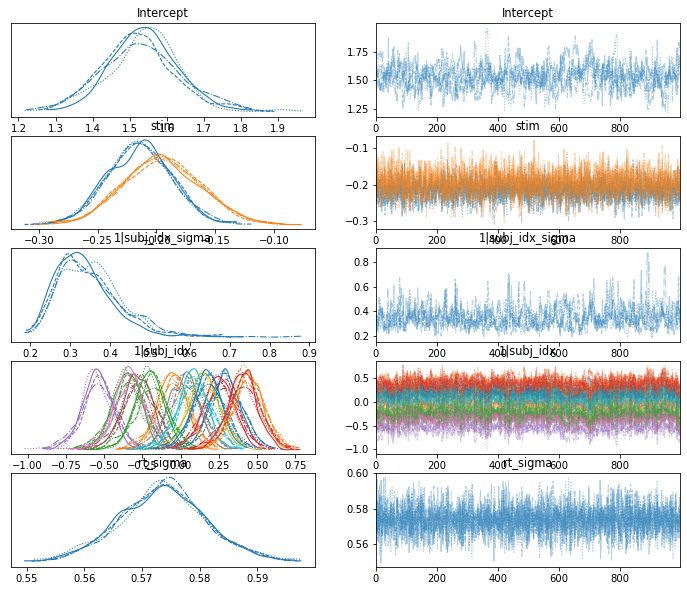

In [14]:
az.plot_trace(fitted_m1)

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'stim\nWL'}>,
        <AxesSubplot:title={'center':'stim\nWW'}>],
       [<AxesSubplot:title={'center':'1|subj_idx_sigma'}>,
        <AxesSubplot:title={'center':'rt_sigma'}>, <AxesSubplot:>]],
      dtype=object)

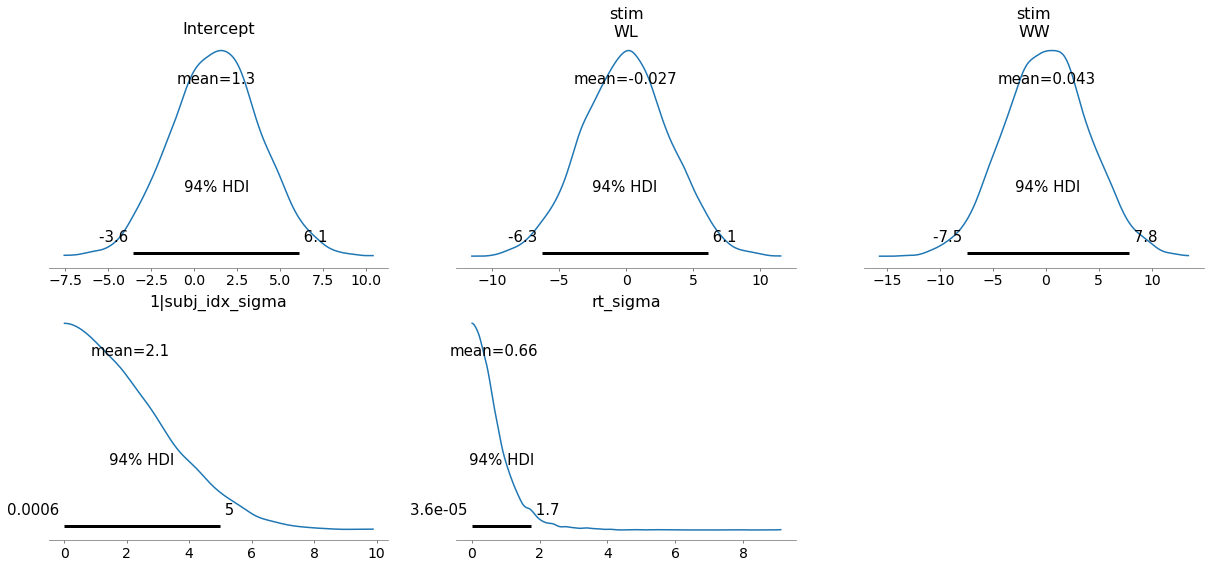

In [15]:
model1.plot_priors()